LT reviewer link - https://docs.google.com/document/d/1ZGFp5LS4fvFhAdrG_6DH3-iWyi3O2R8UO4BpSf-j5Ug/edit

# Notebook 6: Information based learning - Decision Trees, Random Forest and Gradient Boosting Methods 

#### Compiled and Organized by: Christopher Monterola


You will familiarize yourself with three very useful machine learning methods that are all based on heirarchial thresholding, namely:

1. Decision Trees  
2. Ensemble Models   
   2.1 Random Forest    
   2.2 Gradient Boosting Method (Gradient Boosted Regression Trees) 

**Random Forest** and **Gradient Boosting Method** are ensemble decision tree models that aims to improve decision trees **generalization capability** however it suffers from difficulty of **interpreting** the important features of a standard decision tree model.


#### This notebook is mainly based on the following references:

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017.   
Python Machine Learning, Sebastian Raschka and Vahid Mirjalili.




# General Idea:  Decision Trees

Decision trees are a widely used models for classification and regression tasks.
Essentially, they learn a hierarchy of “if-else” questions, leading to a decision.

These questions are similar to the questions you might ask in a game of twenty questions https://en.wikipedia.org/wiki/Twenty_Questions. Imagine you want to distinguish between the following four animals: bears, hawks, penguins and dolphins.

Your goal is to get to the right answer asking as few if-else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two animals.
If the answer is yes, you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether or not the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals,
for example, asking whether the animal has fins.

This series of questions can be expressed as a decision tree, as shown in Figure below. In this illustration, each node in the tree either represents a question, or a terminal node (also called a leaf) which contains the answer. The edges connect the answers to a question with the next question you would ask.

In [119]:
!pip install mglearn

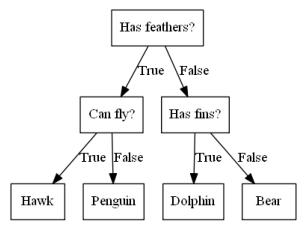

In [120]:
import mglearn #library provided by amueller
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

mglearn.plots.plot_animal_tree()

In machine learning parlance, we built a model to distinguish between four classes of
animals (hawks, penguins, dolphins and bears) using the three features “has feathers”,
“can fly” and “has fins”.
Instead of building these models by hand, we can learn them from data using supervised
learning.

# 1. Building Decision Trees

Let’s go through the process of building a decision tree for the 2d classification dataset
shown at the top of Figure tree_building. The dataset consists of two half-moon
shapes of blue and red points, consisting of 50 data points each. We will refer to this
dataset as two_moons.

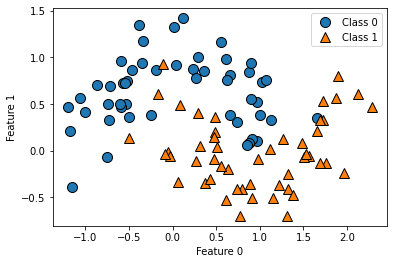

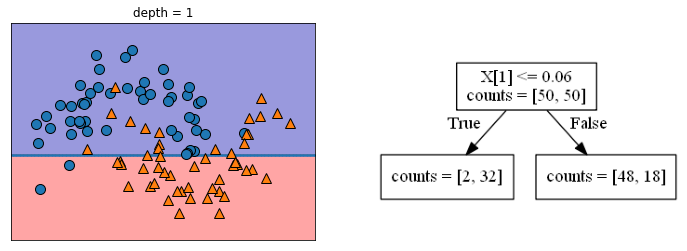

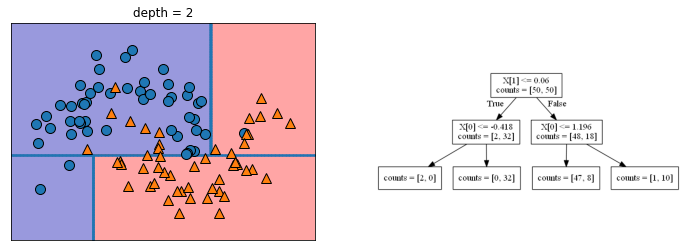

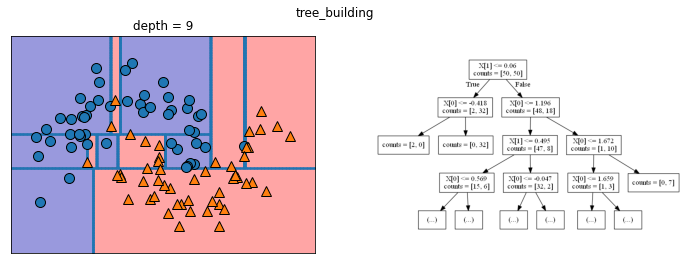

In [121]:
mglearn.plots.plot_tree_progressive()
plt.suptitle("tree_building");

Learning a decision tree means learning a sequence of *if/else* questions that gets us to
the true answer most quickly. In the machine learning setting, these questions are called *tests* (not to be confused with the test set, which is the data we use to test to see how generalizable our model
is).

Usually data does not come in the form of binary yes/no features as in the animal
example, but is instead represented as continuous features such as in the 2d dataset
shown in the figure. The tests that are used on continuous data are of the from “is
feature i larger than value a”.

To build a tree, the algorithm searches over all possible tests, and finds the one that is
most informative about the target variable.



The second row in Figure tree_building shows the first test that is picked. Splitting
the dataset vertically at x[1]=0.06 yields the most information; it best separates the
blue points from the red points (**Mathematical details of which is described in the <a id='text1'>[appendix 1](#a1)</a>**). The top node, also called the root, represents the whole dataset, consisting of 50 red and 50 blue points. The split is done by testing whether x[1] <= 0.06, indicated by a blue line. If the test is true, a point is
assigned to the left node, which contains 2 blue points and 32 red points. Otherwise
the point is assigned to the right node, which contains 48 blue points and 18 red
points. These two nodes correspond to the top and bottom region shown in Figure
tree_building.

Even though the first split did a good job of separating the blue and red points, the
bottom region still contains blue points, and the top region still contains red points.
We can build a more accurate model by repeating the process of looking for the best
test in both regions.

Figure tree_building shows that the most informative next split for the left and the
right region are based on x[0]. This recursive process yields a binary tree of decisions, with each node containing a test.



Alternatively, you can think of each test as splitting the part of the data that is currently
considered along one axis. This yields a view of the algorithm as building a
hierarchical partition. As each test concerns only a single feature, the regions in the
resulting partition always have axis-parallel boundaries. Figure tree_building illustrates the partitioning of the data in the left hand column, and the resulting tree in the right hand column.
The recursive partitioning of the data is usually repeated until each region in the partition
(each leaf in the decision tree) only contains a single target value (a single classor a single regression value). A leaf of the tree containing only one target value is
called pure.

A prediction on a new data point is made by checking which region of the partition
of the feature space the point lies in, and then predicting the majority target (or the
single target in the case of pure leaves) in that region. The region can be found by
traversing the tree from the root and going left or right, depending on whether the
test is fulfilled or not.

## Controlling complexity of Decision Trees

Typically, building a tree as described above, and continuing until all **leaves** are *pure
leads* to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class. The overfitting
can be seen on the left of Figure tree_building in the bottom column. You can
see the regions determined to be <span style="color:red">red</span> in the middle of all the <span style="color:cyan">blue</span> points. On the other
hand, there is a small strip of blue around the single blue point to the very right. This
is not how one would imagine the decision boundary to look, and the decision
boundary focuses a lot on single outlier points that are far away from the other points
in that class.



There are two common strategies to prevent overfitting: **stopping the creation of the
tree early**, also called **pre-pruning**, or **building the tree but then removing or collapsing
nodes that contain little information**, also called **post-pruning** or just pruning. Possible
criteria for pre-pruning include limiting the maximum depth of the tree,
**limiting the maximum number of leaves**, or requiring a minimum number of points
in a node to keep splitting it.

Decision trees in scikit-learn are implemented in the *DecisionTreeRegressor* and
*DecisionTreeClassifier* classes. Scikit-learn only implements pre-pruning, not postpruning.
Let’s look at the effect of pre-pruning in more detail on the breast cancer dataset.
As always, we import the dataset and split it into a training and test part.
Then we build a model using the default setting of fully developing the tree (growing
the tree until all leaves are pure). We fix the random_state in the tree, which is used
for tie-breaking internally.

# Example 1. Boston Breast Cancer data Set

We use this data set again! Recall, features are physical measurements and target is wether the cancer cell is benign or malignant.

In [122]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [123]:
df.shape

(569, 31)

In [124]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937063


As expected, the accuracy on the training set is 100% as the leaves are pure. The test-set accuracy is slightly worse than the linear models above, which had
around $95\%$ accuracy.

Now let’s apply pre-pruning to the tree, which will stop developing the tree before we
perfectly fit to the training data. One possible way is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked (cf.
Figure tree_building).

In [125]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.995305
accuracy on test set: 0.937063


In [126]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,100,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, stratify=cancer.target, 
                                                        test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []
    maxdepth_settings = range(1, 50) # try max_depth from 1 to 50

    for depth in maxdepth_settings:   
        tree = DecisionTreeClassifier(max_depth=depth)  # build the model
        tree.fit(X_train, y_train)

        training_accuracy.append(tree.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(tree.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Average Test Set Achieved = 0.932895
Best max_depth Parameters = 5


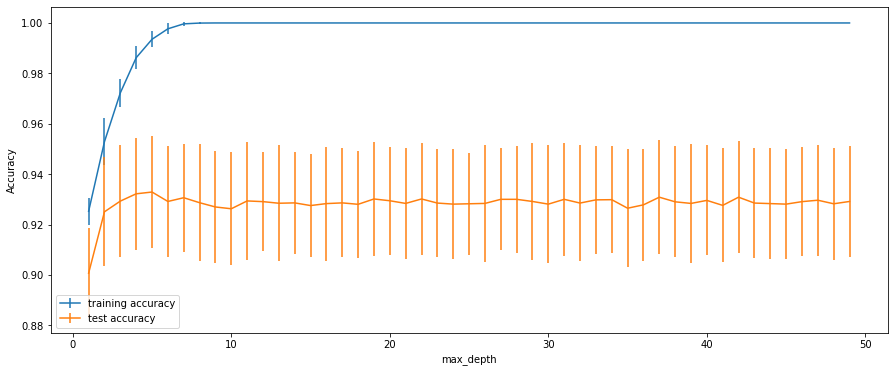

In [127]:
fig = plt.figure(figsize=(15, 6))
plt.errorbar(maxdepth_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy")
plt.errorbar(maxdepth_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
bestdepth=np.argmax(lahat_test.mean(axis=1))+1
print("Highest Average Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best max_depth Parameters = %d" %bestdepth )


Too small values of the depth of the tree will result to underfitting but limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

## Analyzing Decision Trees

We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the dot file format, which is a text file format for storing graphs.
We set an option to color the nodes to reflect the majority class in each node and pass
the class and features names so the tree can be properly labeled.

In [128]:
tree = DecisionTreeClassifier(max_depth=2, random_state=10)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

accuracy on training set: 0.950704
accuracy on test set: 0.930070


We can read this file and visualize it using the graphviz module (or you can use any
program that can read dot files):

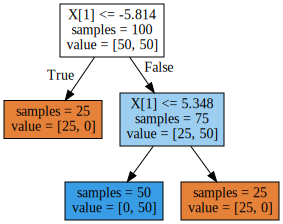

In [144]:
import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

We combine below the last three codes so we can play around with ease the impact of the max_depth parameter.

accuracy on training set: 0.967136
accuracy on test set: 0.923077


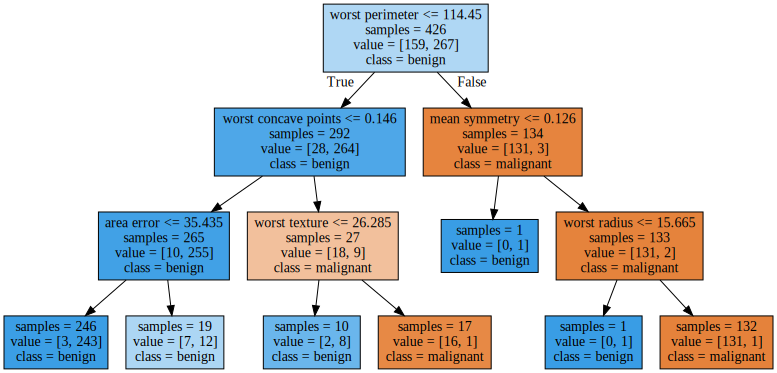

In [130]:
tree = DecisionTreeClassifier(max_depth=3, random_state=10)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The visualization of the tree provides a great in-depth view of how the algorithm
makes predictions, and is a good example of a machine learning algorithm that is
easily explained to non-experts. However, even with a tree of depth four, as seen here,
the tree can become a bit overwhelming. Deeper trees (depth ten is not uncommon)
are even harder to grasp.

One method of inspecting the tree that may be helpful is to find out which path most
of the data actually takes.

The *n_samples* shown in each node in the figure gives the number of samples in each
node, while value provides the number of samples per class.

Following the branches to the right, we see that *worst radius* > 16.795 creates a
node that only contains 8 benign but 134 malignant samples. The rest of this side of
the tree then uses some finer distinctions to split off these 8 remaining benign samples.
Of the 142 samples that went to the right in the initial split, nearly all of them
(132) end up in the leaf to the very right.

Taking a left at the root, for *worst radius* <= 16.7956, we end up with 25 malignant
and 259 benign samples. Nearly all of the benign samples end up in the second leave from the right, with most
of the other leaves only containing very few samples.

### Feature Importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful statistics that we can derive properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and
1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the
target”.

The feature importances always sum to one.

In [131]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01085131, 0.        ,
       0.        , 0.        , 0.        , 0.0252226 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01101572, 0.03897843, 0.80470533, 0.        , 0.        ,
       0.        , 0.        , 0.10922661, 0.        , 0.        ])

We can visualize the feature importances in a way that is similar to the way we visualize the coefficients in the linear model or using a bar graph whichever is your preference.

(0.0, 1.0)

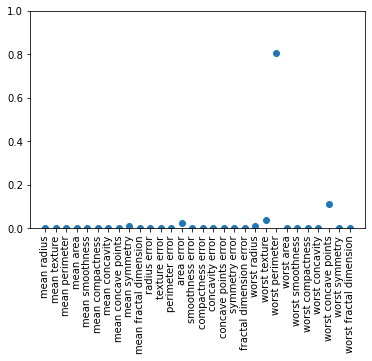

In [132]:
plt.plot(tree.feature_importances_.tolist(), 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.ylim(0, 1)

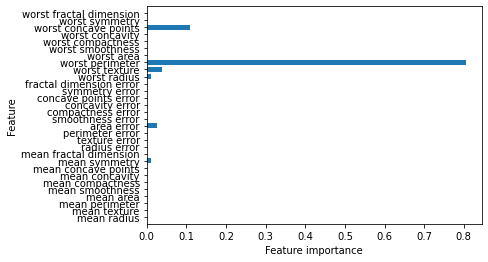

In [133]:
import numpy as np

def plot_feature_importances_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
    
plot_feature_importances_cancer(tree)

Here, we see that the feature used at the top split (“worst perimeter”) is by far the most
important feature. This confirms our observation in analyzing the tree, that the first
level already separates the two classes fairly well.

However, if a feature has a low feature_importance, it doesn’t mean that this feature
is uninformative. It only means that this feature was not picked by the tree, likely
because another feature encodes the same information.

In contrast to the coefficients in linear models, feature importances are always positive,
and don’t encode which class a feature is indicative of. The feature importances
tell us that worst radius is important, but it does not tell us whether a high radius is
indicative of a sample being “benign” or “malignant”. In fact, there might not be such
a simple relationship between features and class, as you can see in the example below:

Feature importances: [0. 1.]


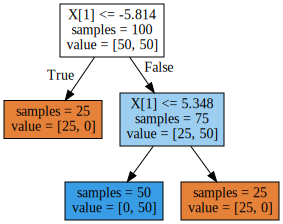

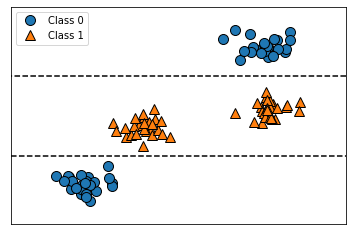

In [134]:
mglearn.plots.plot_tree_not_monotone()

The plot shows a dataset with two features and two classes. Here, all the information
is contained in X[1], and X[0] is not used at all. But the relation between X[1] and
the output class is not monotonous, meaning we cannot say “a high value of X[0]
means class red, and a low value means class blue” or the other way around.

While we focuses our discussion here on decision trees for classification, all that was
said is similarly true for decision trees for regression, as implemented in Decision
TreeRegressor. Both the usage and the analysis of regression trees are very similar to
classification trees, so we won’t go into any more detail here.

Since the algorithm is similar for regression and classification, the standard term being used is CART (Classification and Regression Trees).


### Strengths, weaknesses and parameters

As discussed above, the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually picking one of the pre-pruning strategies, either setting min_depth, max_leaf_nodes or min_samples_leaf is to prevent overfitting.

Decision trees have two advantages over many of the algorithms we discussed so far:

(1) The resulting model can easily be visualized and understood by non-experts (at least
for smaller trees), and 

(2) the algorithms is **completely invariant to scaling of the data**: As
each feature is processed separately, and the possible splits of the data don’t depend
on scaling, no preprocessing like normalization or standardization of features is
needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completelydifferent scales, or a mix of binary and continuous features.

The **main down-side** of decision trees is that even with the use of pre-pruning, *decision
trees tend to overfit*, and provide poor generalization performance. Therefore, in
most applications, the ensemble methods we discuss below are usually used in place
of a single decision tree.

# 2. Ensembles of Decision Trees
<u>Ensembles are methods that combine multiple machine learning models to create
more powerful models.</u>

There are many models in the machine learning literature that belong to this category,
but there are two ensemble models that have proven to be effective on a wide
range of datasets for classification and regression, both of which use decision trees as
their building block: Random Forests and Gradient Boosted Decision Trees.



# 2.1 Random Forests

As observed above, a main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. Random forests are essentially a collection of
decision trees, where each tree is slightly different from the others.
The idea of random forests is that each tree might do a relatively good job of predicting,
but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results. This reduction in overfitting,
while retaining the predictive power of the trees, can be shown using rigorous
mathematics.

To implement this strategy, we need to build many decision trees. Each tree should do
an acceptable job of predicting the target, and should also be different from the other
trees. Random forests get their name from injecting randomness into the tree building
to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test. Let’s go into this process in more detail.




### Building Random Forests

To build a random forest model, you need to decide on the number of trees to build
(the n_estimator parameter of RandomForestRegressor or RandomForestClassifier). Lets say we want to build 10 trees. These trees will be built completely independent
from each other, and the algorithm will make random choices to make sure the trees are
distinct. 

To build a tree, we first take what is called a **bootstrap sample** of our data. A **bootstrap
sample** means from our n_samples data points, we repeatedly draw an example randomly
with replacement (i.e. the same sample can be picked multiple times), n_samples times. 
This will create a dataset that is as big as the original dataset, but some
data points will be missing from it, and some will be repeated.

To illustrate, lets say we want to create a bootstrap sample of the list ['a', 'b', 'c',
'd']. A possible bootstrap sample would be ['b', 'd', 'd', 'c']. Another possible
sample would be ['d', 'a', 'd', 'a'].



Next, a decision tree is built based on this newly created dataset. However, the algorithm
we described for the decision tree is slightly modified. Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and looks for the best possible test involving one of these features. The
amount of features that is selected is controlled by the <u>**max_features**</u> parameter.
This selection of a subset of features is repeated separately in each node, so that each
node in a tree can make a decision using a different subset of the features.

The bootstrap sampling leads to each decision tree in the random forest being built
on a slightly different dataset. Because of the selection of features in each node, each
split in each tree operates on a different subset of features. Together these two mechanisms
ensure that all the trees in the random forests are different. (see below: Figure taken from https://www.researchgate.net/figure/llustration-of-random-forest-a-In-the-training-process-each-decision-tree-is-built_fig3_317274960 Kai Liu et al, An Object-based Approach for Two-level Gully Feature Mapping Using High-resolution DEM and Imagery, Chinese Geographical Science 27(3):415-430). 


 ![RandomForest width="800px"](https://user-images.githubusercontent.com/25600601/112874432-86ed0680-90f5-11eb-98ba-a779a0550b56.png)


A critical parameter in this process is max_features. If we set max_features to n_features, that means that each split can look at all features in the dataset, and no randomness
will be injected. If we set max_features to one, that means that the splits
have no choice at all on which feature to test, and can only search over different
thresholds for the feature that was selected randomly.

Therefore, a high max_features means that the trees in the random forest will be
quite similar, and they will be able to fit the data easily, using the most distinctive features.
A low max_features means that the trees in the random forest will be quite
different, and that each tree might need to be very deep in order to fit the data well.

To make a prediction using the random forest, the algorithm first makes a prediction
for every tree in the forest. For regression, we can average these results to get our final
prediction. For classification, a “soft voting” strategy is used. This means each algorithm
makes a “soft” prediction, providing a probability for each possible output
label. The probabilities predicted by all the trees are averaged, and the class with the
highest label is predicted.

### Analyzing Random Forests

Let’s apply a random forest consisting of five trees to the two_moon data we studied
above

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


RandomForestClassifier(n_estimators=5, random_state=2)

The trees that are built as part of the random forest are stored in the estimator_
attribute. Let’s visualize the decision boundaries learned by each tree, together with
their aggregate prediction, as made by the forest.

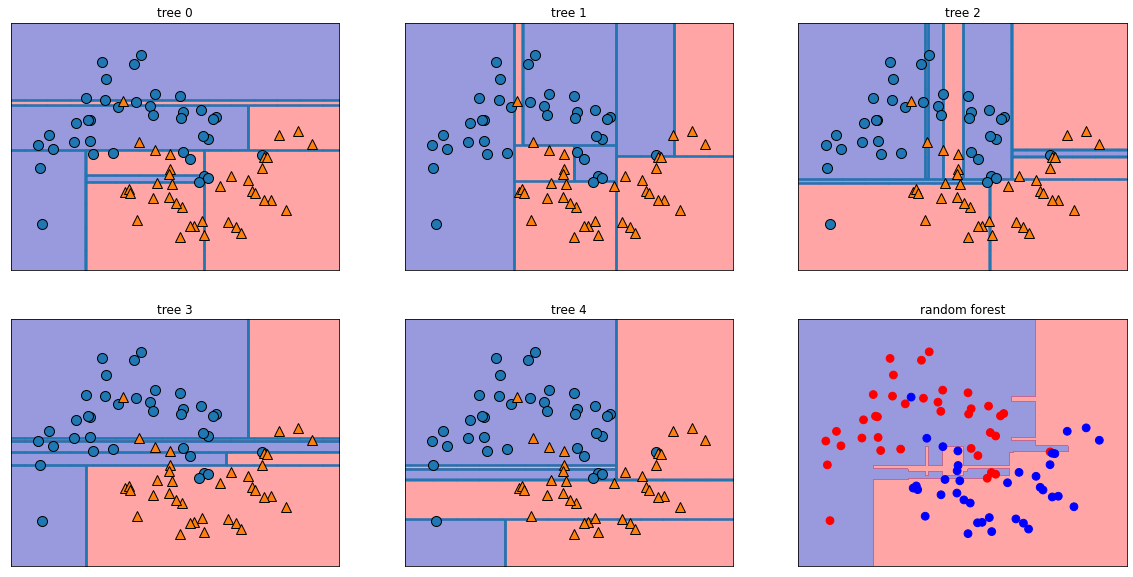

In [136]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree %d" % i)
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.array(['r', 'b'])[y_train], s=60)

You can clearly see that the decisions learned by the five trees are quite different. Each
of them makes some mistakes, as some of the training points that are plotted here
were not actually included in the training set of the tree, due to the bootstrap sampling.

The random forest overfit less than any of the trees individually, and provides a much more intuitive decision boundary. In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries. Let’s apply a random forest consisting of 100 trees on the breast cancer dataset:

In [137]:

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, max_features=.7, max_depth=6, random_state=0)
forest.fit(X_train, y_train)
print("accuracy on training set: %f" % forest.score(X_train, y_train))
print("accuracy on test set: %f" % forest.score(X_test, y_test))

accuracy on training set: 0.997653
accuracy on test set: 0.986014


The random forest gives us an accuracy > 98%, better than the linear models or a
single decision tree, without tuning any parameters. We could adjust the *max_features* setting, or apply pre-pruning as we did for the single decision tree.

However, often the default parameters of the random forest already work quite well.
Similarly to the decision tree, the random forest provides feature importances, which
are computed by aggregating the feature importances over the trees in the forest. Typically the feature importances provided by the random forest are more reliable than the ones provided by a single tree.

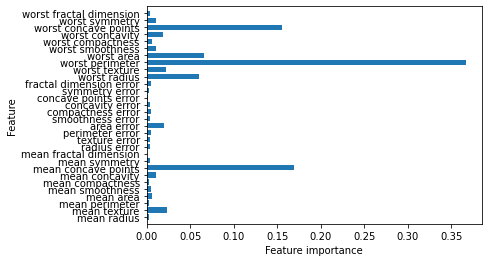

In [138]:
plot_feature_importances_cancer(forest)
#np.argmax(plot_feature_importances_cancer(forest))

As you can see, the random forest gives non-zero importance to many more features
than the single tree.Similarly to the single decision tree, the random forest also gives a
lot of importance to the “worst radius”, but it actually chooses “worst perimeter” to be
the most informative feature overall. The randomness in building the random forest
forces the algorithm to consider many possible explanations, the result of which
being that the random forest captures a much broader picture of the data than a single
tree.

# Strengths, weaknesses and parameters: Random Forest

Random forests for regression and classification are currently among the most widely
used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and
don’t require scaling of the data.

Essentially, random forests share all of the benefits of decision trees, while making up
for some of their deficiencies. One reason to still use decision trees is if you need a compact representation of the decision making process. It is basically impossible to interpret tens or hundreds of
trees in detail, and trees in random forests tend to be deeper than decision trees
(because of the use of feature subsets). Therefore, if you need to summarize the prediction
making in a visual way to non-experts, a single decision tree might be a better
choice.

While building random forests on large dataset might be somewhat time-consuming,
it an be parallelized across multiple CPU cores within a computer easily. If you are
using a multi-core processor (as nearly all modern computers do), you can use the
*n_jobs* parameter to adjust the number of cores to use. Using more CPU cores will
result in linear speed-ups (using two cores, the training of the random forest will be
twice as fast), but specifying *n_jobs* larger than the number of cores will not help.



You can set *n_jobs=-1* to use all the cores in your computer. You should keep in mind that random forests, by their nature, are random, and setting different random states (or not setting the random_state at all) can drastically change the model that is built. The more trees there are in the forest, the more robust
it will be against the choice of random state. If you want to have reproducible results, it is important to fix the random_state. Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate.
Random forests usually work well even on very large datasets, and training can easily
be parallelized over many CPU cores within a powerful computer. However, random
forests require more memory and are slower to train and to predict than linear models.
If time and memory are important in an application, it might make sense to use a
linear model instead.

### The important parameters to adjust are n_estimators, max_features and possibly pre-pruning options like max_depth. 

For **n_estimators**, larger is always better. Averaging more trees will yield a more robust ensemble. However, there are diminishing returns, and more trees need more memory and more time to train. A common rule
of thumb is to build “as many as you have time / memory for”. 

As described above **max_features** determines how random each tree is, and a smaller
*max_features* reduces overfitting. The default values, and a good rule of thumb, are
**max_feature=sqrt(n_features)** for classification and **max_features=log2(n_features)** for regression. Adding max_features or max_leaf_nodes might sometimes improve performance. It can also drastically reduce space and time requirements for training and prediction.

And **max_depth** as before higher value of **max_depth** will result to overfitting, smaller number will result to underfitting.

# 2.2 Gradient Boosted Regression Trees (Gradient Boosting Machines or Gradient Boosting Methods or GBM)

Gradient boosted regression trees is another ensemble method that combines multiple
decision trees to a more powerful model. Despite the “regression” in the name,
these models can be used for regression and classification.
In contrast to random forests, gradient boosting works by building trees in a serial
manner, where each tree tries to correct the mistakes of the previous one. There is no
randomization in gradient boosted regression trees; instead, strong pre-pruning is
used. Gradient boosted trees often use very shallow trees, of depth one to five, often
making the model smaller in terms of memory, and making predictions faster.

The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance (see APPENDIX 2 for details).

Gradient boosted trees are frequently the **winning entries** in machine learning competitions,
and are widely used in industry. They are generally a bit more sensitive to
parameter settings than random forests, but can provide better accuracy if the parameter
are set correctly.

Apart from the pre-pruning and the number of trees in the ensemble, another important
parameter of gradient boosting is the learning_rate which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex models.
Similarly, adding more trees to the ensemble, which can be done by increasing
n_estimators, also increases the model complexity, as the model has more chances
to correct mistakes on the training set.

Here is an example of using GradientBoostingClassifier on the breast cancer dataset.
By default, 100 trees (**n_estimator=100**) of maximum depth 3 (**max_depth=3**) are used, with a **learning rate** of 0.1.

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))



accuracy on training set: 1.000000
accuracy on test set: 0.965035


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting,
we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [140]:
gbrt = GradientBoostingClassifier(max_depth=4)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.958042


In [141]:
gbrt = GradientBoostingClassifier(n_estimators =500, max_depth=3, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)
print("accuracy on training set: %f" % gbrt.score(X_train, y_train))
print("accuracy on test set: %f" % gbrt.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.965035


Both methods of decreasing the model complexity decreased the training set accuracy
as expected. In this case, lowering the maximum depth of the trees provided a significant
improvement of the model, while lowering the learning rate only
increased the generalization performance slightly.

As for the other decision tree based models, we can again visualize the feature importances
to get more insight into our model. As we used 100 trees, it is impractical to
inspect them all, even if they are all of depth 1.

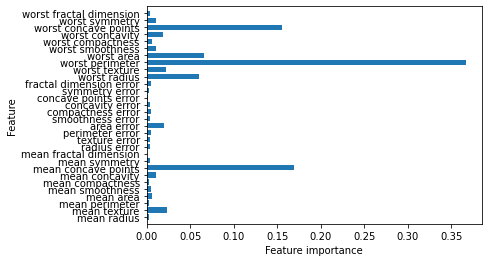

In [142]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(forest)

We can see that the feature importances of the gradient boosted trees are somewhat
similar to the feature importances of the random forests, though the gradient boosting
completely ignored some of the features.

As gradient boosting and random forest perform well on similar kinds of data, a
common approach is to first try random forests, which work quite robustly. If random
forests work well, but prediction time is at a premium, or it is important to
squeeze out the last percentage of accuracy from the machine learning model, moving
to gradient boosting often helps.

If you want to apply gradient boosting to a large scale problem, it might be worth
looking into the xgboost package and its python interface, which at the time of writing
is faster (and sometimes easier to tune) than the scikit-learn implementation of
gradient boosting on many datasets.

# Strengths, weaknesses and parameters: GBM

Gradient boosted decision trees are among the **most powerful** and **widely used models**
for supervised learning. Their main drawback is that they require careful tuning of the parameters, and may
take a long time to train.

Similarly to other tree-based models, the algorithm works well without scaling and
on a mixture of binary and continuous features. As other tree-based models, it also
often does not work well on high-dimensional sparse data.

The main parameters of the gradient boosted tree models are the number of trees **n_estimators**, and the **learning_rate**, which controls how much each tree is allowed to correct the mistakes of the previous trees.

These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build a model of similar complexity. In contrast to random forests, where higher **n_estimators** is always better, increasing **n_estimators** in gradient boosting leads to a more complex model, which may lead to overfitting.

A common practice is to fit **n_estimators** depending on the time and memory budget, and then search over different *learning_rates*. Another important parameter is **max_depth**, which is usually very low for gradient
boosted models (**typically 3-5**), often not deeper than five splits.

<a id='a1'></a> [(back to text)](#text1)
# APPENDIX 1. Gini and Entropy measure in Decision Trees

Using the decision algorithm, we start at the tree root and split the data on the
feature that results in the largest Information Gain (IG), which will be explained in
more detail in the following. In an iterative process, we can then repeat this
splitting procedure at each child node until the leaves are pure. This means that the
samples at each node all belong to the same class. In practice, this can result in a very
deep tree with many nodes, which can easily lead to overfitting. Thus, we typically
want to prune the tree by setting a limit for the maximal depth of the tree.


#### Maximizing information gain – getting the most bang for your buck

In order to split the nodes at the most informative features, we need to define an
objective function that we want to optimize via the tree learning algorithm. Here, our
objective function is to maximize the information gain at each split, which we define
as follows:

\begin{equation}
IG(D_p, f)= I (D_p) -\sum_{j=1}^m \frac{N_j}{N_p}I(D_j)
\end{equation}

Here, $f$ is the feature to perform the split, $D_p$ and $D_j$ are the dataset of the parent and jth child node, $I$ is our impurity measure, $N_p$ is the total number of samples at the parent node, and $N_j$ is the number of samples in the jth child node.
As we can see, the information gain is simply the difference between the impurity of the parent node and the sum of the child node impurities — the lower the impurity of the child
nodes, the larger the information gain. However, for simplicity and to reduce the
combinatorial search space, most libraries (including scikit-learn) implement binary
decision trees. This means that each parent node is split into two child nodes, $D_{left}$
and $D_{right}$:

\begin{equation}
IG(D_p, f)= I (D_p) -\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right})
\end{equation}

Now, the three impurity measures or splitting criteria that are commonly used in
binary decision trees are **Gini impurity** ($I_G$), **entropy** ($I_H$), and the **classification error** ($I_E$). Let us start with the definition of entropy for all non-empty classes $(p( i | t )\neq 0)$:

\begin{equation}
I_H(t)=-\sum_{i=1}^c p( i | t ) \log_2 p( i | t )
\end{equation}

Here, $(p( i | t )$ is the proportion of the samples that belong to class $c$ for a particular node $t$. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution. For example, in a binary class setting, the entropy is 0 if $p (i =1| t ) =1$ or $p(i = 0 | t ) = 0$. If the classes are distributed uniformly with $p (i =1| t ) = 0.5$ and $p(i = 0 | t ) = 0.5$, the entropy is 1. Therefore, we can say that the entropy criterion attempts to maximize the mutual information in the tree.

Intuitively, the Gini impurity can be understood as a criterion to minimize the probability of misclassification:

\begin{equation}
I_G(t)= \sum_{i=1}^c p( i | t ) (1- p( i | t )) = 1-\sum_{i=1}^c p( i | t )^2 
\end{equation}

Similar to entropy, the Gini impurity is maximal if the classes are perfectly mixed, for example, in a binary class setting ($c = 2$):

\begin{equation}
I_G(t)= 1-\sum_{i=1}^c 0.5^2 = 1-.5^2 -.5^2 =0.5 
\end{equation}

However, in practice both Gini impurity and entropy typically yield very similar results, and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

Another impurity measure is the classification error:

\begin{equation}
I_E(t)= 1-max\{p( i | t )\}
\end{equation}


This is a useful criterion for pruning but not recommended for growing a decision
tree, since it is less sensitive to changes in the class probabilities of the nodes. We
can illustrate this by looking at the two possible splitting scenarios shown in the
following figure:

<img width="760" alt="decision_tree" src="https://user-images.githubusercontent.com/25600601/112872853-70de4680-90f3-11eb-946a-0878792e81cd.png">

We start with a dataset $D_p$ at the parent node $D_p$, which consists 40 samples from class 1 and 40 samples from class 2 that we split into two datasets, $D_{left}$ and $D_{right}$. 

The information gain $IG$ using the **classification error** as a splitting criterion would be the same ($IG_E$ = 0.25) in both scenarios, A and B:

$I_E(D_p)=1-0.5 =0.5$

A: $I_E(D_{left})=1-\frac{3}{4}=0.25$

A: $I_E(D_{right})=1-\frac{3}{4}=0.25$

A: $IG_E=0.5-\frac{4}{8} 0.25 -\frac{4}{8} 0.25 =0.25$

B: $I_E(D_{left})=1-\frac{4}{6}=\frac{1}{3}$

B: $I_E(D_{right})=1-1 = 0$

B: $IG_E=0.5-(\frac{6}{8}\times \frac{1}{3}) -(\frac{2}{8}\times0) =0.25$



However, the **Gini impurity** would favor the split in scenario B ($IG_G =0.16$) over scenario A ($IG_G =0.125$), which is indeed more pure:

Recall the Gini entropy is given by:

\begin{equation}
I_G(t)= \sum_{i=1}^c p( i | t ) (1- p( i | t )) = 1-\sum_{i=1}^c p( i | t )^2 
\end{equation}


<img width="760" alt="decision_tree" src="https://user-images.githubusercontent.com/25600601/112872853-70de4680-90f3-11eb-946a-0878792e81cd.png">

$I_G(D_p)=1-(0.5^2 +0.5^2) =0.5$

A: $I_G(D_{left})=1-(\frac{3}{4}^2 + \frac{1}{4}^2) = \frac{3}{8}=0.375$

A: $I_G(D_{right})=1-(\frac{1}{4}^2 + \frac{3}{4}^2) = \frac{3}{8}=0.375$

A: $IG_G=0.5-\frac{4}{8} 0.375 -\frac{4}{8} 0.375 =0.125$

B: $I_G(D_{left})=1-(\frac{2}{6}^2 + \frac{4}{6}^2) = \frac{4}{9}=0.4$

B: $I_G(D_{right})=1-(1^2 + 0^2) = 0$

B: $IG_G=0.5-\frac{6}{8} 0.4 -\frac{2}{8}0^2 =0.16$



Similarly, the **entropy criterion** would also favor scenario B ($IG_H =0.31$)over scenario A ($IG_H =0.19$):


$I_H(D_p)=-(0.5 \log_2(0.5) +0.5\log_2(0.5)) =1$

A: $I_H(D_{left})=-(\frac{3}{4}\log_2\frac{3}{4} + \frac{1}{4}\log_2\frac{1}{4}) = 0.81$

A: $I_H(D_{right})=-(\frac{1}{4}\log_2\frac{1}{4} + \frac{3}{4}\log_2\frac{3}{4}) = 0.81$

A: $IG_H=1-\frac{4}{8} 0.81 -\frac{4}{8} 0.81 =0.19$

B: $I_H(D_{left})=-(\frac{2}{6}\log_2\frac{2}{6} + \frac{4}{6}\log_2\frac{4}{6}) = 0.92$

B: $I_H(D_{right})=0$

B: $IG_H=1-\frac{6}{8} 0.92 -0 =0.31$


For a more visual comparison of the three different impurity criteria that we discussed previously, let us plot the impurity indices for the probability range [0, 1] for class 1. Note that we will also add a scaled version of the entropy (entropy / 2) to observe that the  Gini impurity is an intermediate measure between entropy and the
classification error. The code is given below:

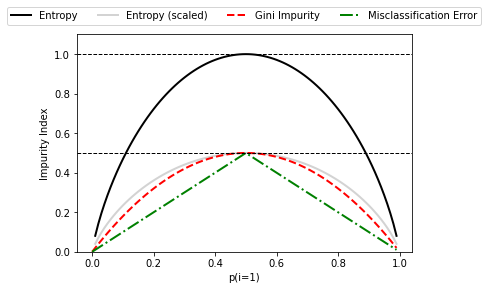

In [143]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)',
            'Gini Impurity', 'Misclassification Error'], ['-', '-', '--', '-.'],
            ['black', 'lightgray','red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

# APPENDIX 2. Gradient Boosting Method

How Gradient Boosting Works (taken from: https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)

Gradient boosting involves three elements: (1) A loss function to be optimized; (2) A weak learner to make predictions; (3) An additive model to add weak learners to minimize the loss function. 

I created Notebook 6 Supplementary A and B to clearly illustrate the process outlined below.

#### 1. Loss Function

The loss function used depends on the type of problem being solved.

It must be differentiable, but many standard loss functions are supported and you can define your own.

For example, regression may use a mean-squared error and classification may use logarithmic loss.

A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

#### 2. Weak Learner

Decision trees are used as the weak learner in gradient boosting.

Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and “correct” the residuals in the predictions.

Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss.

Initially, such as in the case of AdaBoost, very short decision trees were used that only had a single split, called a decision stump. Larger trees can be used generally with 4-to-8 levels.

It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.

This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.

![cart](https://user-images.githubusercontent.com/25600601/112873188-e34f2680-90f3-11eb-886f-c51cc7b669aa.png)

![twocart](https://user-images.githubusercontent.com/25600601/112873276-feba3180-90f3-11eb-94b6-4d3d7e99e3d5.png)


#### 3. Additive Model

Trees are added one at a time, and existing trees in the model are not changed.

A gradient descent procedure is used to minimize the loss when adding trees.

Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.

Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss).

![algorithm-iterations width="1000px"](https://user-images.githubusercontent.com/25600601/112873342-185b7900-90f4-11eb-8292-a3aa8a5a2a9e.png)

Generally this approach is called functional gradient descent or gradient descent with functions.

One way to produce a weighted combination of classifiers which optimizes [the cost] is by gradient descent in function space — Boosting Algorithms as Gradient Descent in Function Space [PDF], 1999.

The output for the new tree is then added to the output of the existing sequence of trees in an effort to correct or improve the final output of the model.

A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.

Here is step by step method on how to implement the gradient boosting method with the corresponding mathematics for those interested: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/pdf/fnbot-07-00021.pdf 
